# PMT based Cosmic Rate measurement
This notebook does only use the event/flash trees

## Imports

In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helpfunction as helper

In [2]:
%matplotlib inline

## Constants

In [4]:
main_tree_name = 'cosmicstudies'
flash_name = 'SimpleBeamFlashes'

outdir = './Output/Paper/'

# Input file lists
file_name_mc = './input/corsika_p_sce_30k.root'
file_name_data = './input/extunbiased_run1_temp.root'

mc_lab = 'CORSIKA'
data_lab = 'Cosmic data (Run 1)'

ub_tag = "MicroBooNE, In Progress"

## Load the data

In [5]:
file_mc = uproot.open(file_name_mc)[main_tree_name]
file_data = uproot.open(file_name_data)[main_tree_name]

In [6]:
data_n = file_data['Event'].numentries
mc_n = file_mc['Event'].numentries
mc_scale = data_n/mc_n

In [7]:
df_flash_mc = file_mc[flash_name].pandas.df()
df_flash_data = file_data[flash_name].pandas.df()

0.16144295302013423
0.15706315554563713


Text(0.5,0,'Simple Beam Flash Time [$\\mu$s]')

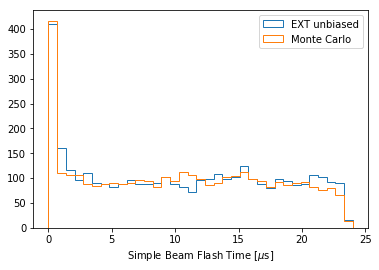

In [25]:
print(len(df_flash_mc)/mc_n)
print(len(df_flash_data)/data_n)
plt.hist(df_flash_mc['flash_time'], bins=35, range = (0,24), histtype = 'step', weights = [mc_scale]*len(df_flash_mc), label='EXT unbiased')
plt.hist(df_flash_data['flash_time']-0.38, bins=35, range = (0,24) , histtype = 'step', label = 'Monte Carlo')
plt.legend()
plt.xlabel(r"Simple Beam Flash Time [$\mu$s]")

In [8]:
df_flash_mc.head()

,event,run,subrun,dataset_prescale_factor,num_flashes,flash_time,flash_difftime,flash_totalPE,flash_z,flash_sz,flash_y,flash_sy,flash_width,flash_abstime,flash_num_PMT10percent
0,966,1,49,1.0,1,14.555000,14.555000,334,208.562302,138.982437,-2.198298,44.250595,3.99,4064.523682,1
1,973,1,49,1.0,1,9.931250,9.931250,392,641.481873,154.175278,2.293458,45.032211,3.99,4059.899902,1
2,14881,1,745,1.0,1,16.849375,16.849375,48,522.466309,167.110245,-5.657216,35.342319,3.99,4066.818115,2
3,14887,1,745,1.0,1,21.156250,21.156250,73,137.064453,124.573242,-0.837541,43.209633,3.99,4071.125000,5
4,14894,1,745,1.0,1,7.471250,7.471250,317,914.307983,148.208237,-12.103930,43.963840,3.99,4057.439941,5


In [8]:
data_num_flashes = file_data[b'Event'].array('num_simplecosmicflashes')
mc_num_flashes = file_mc[b'Event'].array('num_simplecosmicflashes')

## Plots

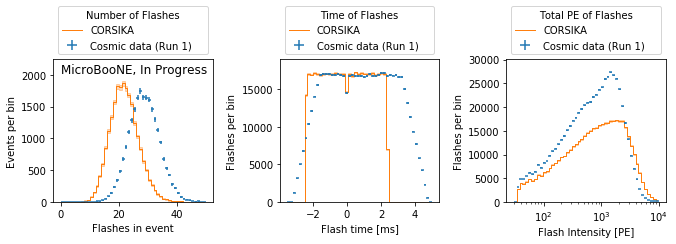

In [9]:
# number of flashes per event, PE of flashes, time of flashes
# data vs MC
# before and after timing cut

fig, ax = plt.subplots(ncols = 3, sharey=False, figsize=(9.5,3.5))
N=50

#Num flashes
x_min = 0
x_max = 50
data = [mc_num_flashes, data_num_flashes]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1])
ax[0].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[0].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[0].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[0].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Number of Flashes', loc='lower center', mode='expand')
ax[0].set_ylim(0, max(max_y)*1.2)
ax[0].set_xlabel("Flashes in event")
ax[0].set_ylabel("Events per bin")
ax[0].text(0, ax[0].get_ylim()[1]*0.9, ub_tag, size=12)


#Time flashes
x_min = -3.5
x_max = 5
data = [df_flash_mc['flash_time']/1000, df_flash_data['flash_time']/1000]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1])
ax[1].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[1].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[1].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[1].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Time of Flashes', loc='lower center', mode='expand')
ax[1].set_ylim(0, max(max_y)*1.1)
ax[1].set_ylabel('Flashes per bin')
ax[1].set_xlabel(r'Flash time [ms]')


#PE flashes
x_min = 30
x_max = 10000
data = [df_flash_mc['flash_totalPE'], df_flash_data['flash_totalPE']]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1], log=True)
ax[2].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[2].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[2].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[2].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Total PE of Flashes', loc='lower center', mode='expand')
ax[2].set_ylim(0, max(max_y)*1.1)
ax[2].set_ylabel('Flashes per bin')
ax[2].set_xlabel(r'Flash Intensity [PE]')
ax[2].set_xscale("log", nonposx='clip')

fig.tight_layout()
fig.savefig(outdir+"flash_beforetime.pdf", bbox_inches="tight")

In [10]:
df_flash_mc['flash_time'].describe()

count    636599.000000
mean        -50.082603
std        1389.103638
min       -2449.906250
25%       -1255.171875
50%         -60.578125
75%        1154.796875
max        2350.109375
Name: flash_time, dtype: float64

In [11]:
# Assume a light yield of 0.8 in data, how would this look in MC?
print(sum(df_flash_mc['flash_totalPE']>42.5)/len(df_flash_mc))
#print(np.mean(num_flash_mc))

0.9860885738117716


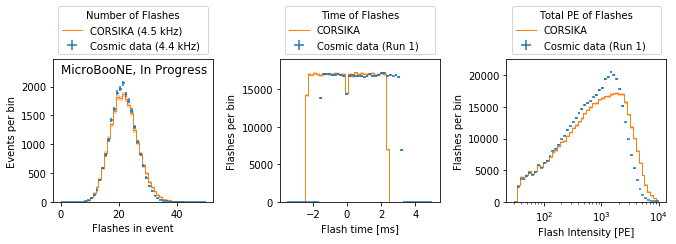

In [12]:
mc_bounds = [25,2350,-0,-2450]
time_query_mc= '((flash_time>@mc_bounds[0]) & (flash_time<@mc_bounds[1])) | \
                ((flash_time<@mc_bounds[2]) & (flash_time>@mc_bounds[3]))' 
time_mc = (4800-25)*1e-6

data_bounds = [25,3200,-0,-1600]
time_query_data= '((flash_time>@data_bounds[0]) & (flash_time<@data_bounds[1])) | \
                  ((flash_time<@data_bounds[2]) & (flash_time>@data_bounds[3]))'
time_data = (4800-25)*1e-6

df_flash_mc_time = df_flash_mc.query(time_query_mc)
df_flash_data_time = df_flash_data.query(time_query_data)
mc_rate = len(df_flash_mc_time)/(mc_n*time_mc)/1000
data_rate = len(df_flash_data_time)/(data_n*time_data)/1000
num_flash_mc = df_flash_mc_time.groupby(['run', 'subrun', 'event', 'num_mcp']).size()
num_flash_data = df_flash_data_time.groupby(['run', 'subrun', 'event']).size()

fig, ax = plt.subplots(ncols = 3, sharey=False, figsize=(9.5,3.5))
N=50

#Num flashes
x_min = 0
x_max = 50
data = [num_flash_mc, num_flash_data]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1])
ax[0].step(edges_mid, bins[0], lw=1, label=mc_lab+' ({0:.1f} kHz)'.format(mc_rate), where='mid', color='C1')
ax[0].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[0].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label='Cosmic data ({0:.1f} kHz)'.format(data_rate))
ax[0].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Number of Flashes', loc='lower center', mode='expand')
ax[0].set_ylim(0, max(max_y)*1.2)
ax[0].set_xlabel("Flashes in event")
ax[0].set_ylabel("Events per bin")
ax[0].text(0, ax[0].get_ylim()[1]*0.9, ub_tag, size=12)


#Time flashes
x_min = -3.5
x_max = 5
data = [df_flash_mc_time['flash_time']/1000, df_flash_data_time['flash_time']/1000]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1])
ax[1].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[1].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[1].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[1].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Time of Flashes', loc='lower center', mode='expand')
ax[1].set_ylim(0, max(max_y)*1.1)
ax[1].set_ylabel('Flashes per bin')
ax[1].set_xlabel(r'Flash time [ms]')


#PE flashes
x_min = 30
x_max = 10000
data = [df_flash_mc_time['flash_totalPE'], df_flash_data_time['flash_totalPE']]
edges, edges_mid, bins, err, max_y = helper.histHelper(N, x_min, x_max, data, weights=[mc_scale,1], log=True)
ax[2].step(edges_mid, bins[0], lw=1, label=mc_lab, where='mid', color='C1')
ax[2].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
ax[2].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
               zorder=3, label=data_lab)
ax[2].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title='Total PE of Flashes', loc='lower center', mode='expand')
ax[2].set_ylim(0, max(max_y)*1.1)
ax[2].set_ylabel('Flashes per bin')
ax[2].set_xlabel(r'Flash Intensity [PE]')
ax[2].set_xscale("log", nonposx='clip')

fig.tight_layout()
fig.savefig(outdir+"flash_aftertime.pdf", bbox_inches="tight")

/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


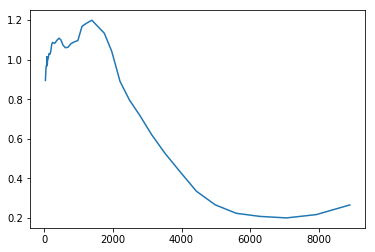

In [13]:
plt.plot(edges[:-1], bins[1]/bins[0])
plt.show()

In [14]:
print(mc_rate, 1/np.sqrt(mc_rate*1000*mc_n*time_mc)*mc_rate)
print(data_rate, 1/np.sqrt(data_rate*1000*data_n*time_data)*data_rate)

4.472110755824168 0.005606107939263312
4.427069032599539 0.006432784237972944


In [15]:
# Correct for 8us dead time after each flash!
from scipy.optimize import fsolve
func = lambda x : R - x*np.exp(-8e-6*x)
a_initial_guess = 5000

R= mc_rate*1000
mc_rate_corr = fsolve(func, a_initial_guess)[0]
R= data_rate*1000
data_rate_corr = fsolve(func, a_initial_guess)[0]

mc_err = 1/np.sqrt(mc_rate*1000*mc_n*time_mc)*mc_rate_corr
data_err = 1/np.sqrt(data_rate*1000*data_n*time_data)*data_rate_corr
print('\nMC: {0:0.0f}+-{1:0.0f}'.format(mc_rate_corr, mc_err))
print('Data: {0:0.0f}+-{1:0.0f}'.format(data_rate_corr, data_err))
ratio = data_rate_corr/mc_rate_corr
r_err = np.sqrt((data_err/data_rate_corr)**2 + (mc_err/mc_rate_corr)**2)*ratio
print('Data/MC: {0:.4f}+-{1:0.4f}'.format(ratio,r_err))


MC: 4641+-6
Data: 4593+-7
Data/MC: 0.9895+-0.0019


/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


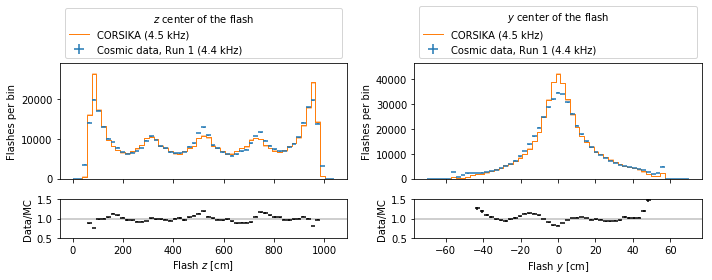

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols=2, sharex='col', figsize=(10,4), gridspec_kw = {'height_ratios':[3, 1]})
axes = [[axes[0][0], axes[1][0]], [axes[0][1], axes[1][1]] ]
fields = ['flash_z', 'flash_y']
lab = [r'$z$', r'$y$']
x_min = [0, -70]
x_max = [1040, 70]
N=55

for ax, field, l, xmin, xmax in zip(axes, fields, lab, x_min, x_max):
    data = [df_flash_mc_time[field], df_flash_data_time[field]]
    edges, edges_mid, bins, err, max_y = helper.histHelper(N, xmin, xmax, data, weights=[mc_scale,1])
    ax[0].step(edges_mid, bins[0], lw=1, label=mc_lab+' ({0:.1f} kHz)'.format(mc_rate), where='mid', color='C1')
    ax[0].fill_between(edges_mid, bins[0] - err[0], bins[0] + err[0], alpha=0.3, step='mid', color='C1')
    ax[0].errorbar(edges_mid, bins[1], yerr=err[1], xerr=edges[:-1]-edges_mid, fmt='none', c='C0', 
                   zorder=3, label='Cosmic data, Run 1 ({0:.1f} kHz)'.format(data_rate))
    ax[0].set_ylabel("Flashes per bin")
    ax[0].legend(bbox_to_anchor=(0., 1.0, 1, 0.2), title=l+' center of the flash', loc='lower center', mode='expand')
    ax[0].set_ylim(0, max(max_y)*1.1)

    ratio = bins[1]/(bins[0])
    ratio_err = np.sqrt(1/bins[1]+1/ (bins[0]/mc_scale))*ratio
    ax[1].errorbar(edges_mid, ratio, xerr= edges[1:]-edges_mid, yerr=ratio_err, fmt='none', color='k')

    ax[1].axhline(y=1,color="k",alpha=0.25)
    ax[1].set_xlabel('Flash '+l+' [cm]')
    ax[1].set_ylabel("Data/MC")
    ax[1].set_ylim(0.5,1.5)
    
fig.tight_layout()    
fig.savefig(outdir+"flashxz.pdf")